In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('message-weather (1).csv').iloc[:, 4:]
data

,max_temperature,min_temperature,region_x,temperature,wind_direction,wind_speed,weather_description,date_hour_x,tg_message
0,-0.2,-3.3,Сумська,-0.2,343,31.2,Overcast,2022-12-02 12:00:00,💥 Хотінь (Сумська обл.)\nЗагроза артилерійсько...
1,2.7,-0.1,Дніпропетровська,2.7,3,28.5,Overcast,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
2,1.7,-1.6,Дніпропетровська,1.7,357,29.9,Partly cloudy,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
3,2.4,0.1,Дніпропетровська,2.4,7,25.4,Overcast,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
4,1.7,-1.6,Дніпропетровська,1.7,357,29.9,Partly cloudy,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
...,...,...,...,...,...,...,...,...,...
8798,18.1,10.2,Херсонська,16.9,248,45.4,Mainly clear,2023-04-01 09:00:00,Херсонська область. Інформація щодо ворожих об...
8799,16.2,3.1,Херсонська,10.7,245,27.7,Mainly clear,2023-03-30 16:00:00,​​⚡️Отримав осколкове поранення під час бомбар...
8800,-1.5,-6.3,Херсонська,-2.7,65,36.1,Overcast,2023-03-10 08:00:00,Херсонська область. Інформація щодо ворожих об...
8801,-1.5,-6.3,Херсонська,-2.7,65,36.1,Overcast,2023-03-10 08:00:00,Херсонська область. Інформація щодо ворожих об...


Для кращого розуміння змінюємо позначення напрямку вітру.

In [3]:
def change_wind(df):
    if df.loc[0, 'wind_direction'] == 'North':
        return df
    else:
        wind = df['wind_direction']
        def wind_dir(deg):
            if deg > 337.5 or deg < 22.5:
                return 'North'
            if 22.5 < deg <= 67.5:
                return 'North-East'
            if 67.5 < deg <= 112.5:
                return 'East'
            if 112.5 < deg <= 157.5:
                return 'South-East'
            if 157.5 < deg <= 202.5:
                return 'South'
            if 202.5 < deg <= 247.5:
                return 'South-West'
            if 247.5 < deg <= 292.5:
                return 'West'
            if 292.5 < deg <= 337.5:
                return 'North-West'
            if deg.isna() or deg.isnull():
                return 'None'
        new_wind = wind.apply(wind_dir)

        df['wind_direction'] = new_wind

        return df
change_wind(data)

,max_temperature,min_temperature,region_x,temperature,wind_direction,wind_speed,weather_description,date_hour_x,tg_message
0,-0.2,-3.3,Сумська,-0.2,North,31.2,Overcast,2022-12-02 12:00:00,💥 Хотінь (Сумська обл.)\nЗагроза артилерійсько...
1,2.7,-0.1,Дніпропетровська,2.7,North,28.5,Overcast,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
2,1.7,-1.6,Дніпропетровська,1.7,North,29.9,Partly cloudy,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
3,2.4,0.1,Дніпропетровська,2.4,North,25.4,Overcast,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
4,1.7,-1.6,Дніпропетровська,1.7,North,29.9,Partly cloudy,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
...,...,...,...,...,...,...,...,...,...
8798,18.1,10.2,Херсонська,16.9,West,45.4,Mainly clear,2023-04-01 09:00:00,Херсонська область. Інформація щодо ворожих об...
8799,16.2,3.1,Херсонська,10.7,South-West,27.7,Mainly clear,2023-03-30 16:00:00,​​⚡️Отримав осколкове поранення під час бомбар...
8800,-1.5,-6.3,Херсонська,-2.7,North-East,36.1,Overcast,2023-03-10 08:00:00,Херсонська область. Інформація щодо ворожих об...
8801,-1.5,-6.3,Херсонська,-2.7,North-East,36.1,Overcast,2023-03-10 08:00:00,Херсонська область. Інформація щодо ворожих об...


Робимо індексами назви районів.

In [4]:
data1 = data.rename(columns = {'region_x': 'region', 'tg_message': 'weapon_type'})
data1 = data1.set_index('region')
data1

,max_temperature,min_temperature,temperature,wind_direction,wind_speed,weather_description,date_hour_x,weapon_type
region,,,,,,,,
Сумська,-0.2,-3.3,-0.2,North,31.2,Overcast,2022-12-02 12:00:00,💥 Хотінь (Сумська обл.)\nЗагроза артилерійсько...
Дніпропетровська,2.7,-0.1,2.7,North,28.5,Overcast,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
Дніпропетровська,1.7,-1.6,1.7,North,29.9,Partly cloudy,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
Дніпропетровська,2.4,0.1,2.4,North,25.4,Overcast,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
Дніпропетровська,1.7,-1.6,1.7,North,29.9,Partly cloudy,2022-12-02 11:00:00,💥 Марганець (Дніпропетровська обл.)\nЗагроза а...
...,...,...,...,...,...,...,...,...
Херсонська,18.1,10.2,16.9,West,45.4,Mainly clear,2023-04-01 09:00:00,Херсонська область. Інформація щодо ворожих об...
Херсонська,16.2,3.1,10.7,South-West,27.7,Mainly clear,2023-03-30 16:00:00,​​⚡️Отримав осколкове поранення під час бомбар...
Херсонська,-1.5,-6.3,-2.7,North-East,36.1,Overcast,2023-03-10 08:00:00,Херсонська область. Інформація щодо ворожих об...


Обробляємо повідомлення про обстріли.
1) Шукаємо в повідомленні ключові слова і змінюємо колонку з повідомленням на вид обстрілу.
2) Додаємо нові колонки з видами обстрілу (1 - була застосована така зброя, 0 - не була)
3) Для повідомлень, у яких немає чіткої інформації, додаємо одиничку в колонку 'other'.

In [22]:
replace_dict = {
    'артилер' : ('Артилерійські обстріли', 'artillery_fire'),
    'шахед' : ('Вибухи шахедів', 'shahed_explosions'),
    'ракет' : ('Ракетні обстріли', 'rocket_attacks'),
    'міномет' : ('Мінометні обстріли', 'mortar_attacks')
}
def change_line(row):
    counter = 0
    for key, value in replace_dict.items():
        if key in row.weapon_type.lower():
            row[value[1]] = 1
            counter += 1
        else:
            row[value[1]] = 0
    if counter == 0:
        row['other'] = 1
    else:
        row['other'] = 0
    new_message = ['💥 ' + v[0] for k,v in replace_dict.items() if k in row.weapon_type]
    if not new_message:
        new_message = ['Немає чіткої інформації']
    row.weapon_type = '\n'.join(new_message)
    return row

data2 = data1.apply(change_line, axis = 'columns')
data2.insert(12, 'weapon_type', data2.pop('weapon_type'))
data2

,max_temperature,min_temperature,temperature,wind_direction,wind_speed,weather_description,date_hour_x,artillery_fire,shahed_explosions,rocket_attacks,mortar_attacks,other,weapon_type
region,,,,,,,,,,,,,
Сумська,-0.2,-3.3,-0.2,North,31.2,Overcast,2022-12-02 12:00:00,1,0,0,0,0,💥 Артилерійські обстріли
Дніпропетровська,2.7,-0.1,2.7,North,28.5,Overcast,2022-12-02 11:00:00,1,0,0,0,0,💥 Артилерійські обстріли
Дніпропетровська,1.7,-1.6,1.7,North,29.9,Partly cloudy,2022-12-02 11:00:00,1,0,0,0,0,💥 Артилерійські обстріли
Дніпропетровська,2.4,0.1,2.4,North,25.4,Overcast,2022-12-02 11:00:00,1,0,0,0,0,💥 Артилерійські обстріли
Дніпропетровська,1.7,-1.6,1.7,North,29.9,Partly cloudy,2022-12-02 11:00:00,1,0,0,0,0,💥 Артилерійські обстріли
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Херсонська,18.1,10.2,16.9,West,45.4,Mainly clear,2023-04-01 09:00:00,1,0,0,1,0,💥 Артилерійські обстріли\n💥 Мінометні обстріли
Херсонська,16.2,3.1,10.7,South-West,27.7,Mainly clear,2023-03-30 16:00:00,0,0,0,0,1,Немає чіткої інформації
Херсонська,-1.5,-6.3,-2.7,North-East,36.1,Overcast,2023-03-10 08:00:00,1,0,0,1,0,💥 Артилерійські обстріли\n💥 Мінометні обстріли


In [20]:
data2.to_csv('changed_data.csv')

Формулюємо датафрейм з загальним числом обстрілів для кожної області.

In [23]:
def change_date(row):
    row.date_hour_x = row.date_hour_x[:10]
    return row
data4 = data2.apply(change_date, axis='columns')
data6 = data4.groupby('region').sum()
data6.loc[:, ['artillery_fire', 'shahed_explosions', 'rocket_attacks', 'mortar_attacks']]

,artillery_fire,shahed_explosions,rocket_attacks,mortar_attacks
region,,,,
Івано-Франківська,0,0,0,0
Вінницька,0,0,13,0
Дніпропетровська,965,12,188,0
Донецька,701,0,1825,105
Житомирська,9,0,27,0
Запорізька,19,0,154,0
Київська,3,0,183,3
Кіровоградська,0,0,8,0
Луганська,637,0,645,73


Середня температура, при якій відбувалися обстріли кожної області.

In [61]:
data10 = data4.groupby('region')['temperature'].mean()
data10

region
Івано-Франківська     2.050000
Вінницька             6.400000
Дніпропетровська      3.500089
Донецька              3.924534
Житомирська           2.804348
Запорізька            5.496970
Київська              2.614047
Кіровоградська        6.750000
Луганська            -0.248536
Львівська             4.365385
Миколаївська          4.488339
Одеська               3.044643
Полтавська            4.735000
Рівненська            4.133333
Сумська               2.221495
Тернопільська         9.300000
Харківська            1.537769
Херсонська            5.519931
Хмельницька           1.617647
Черкаська             6.300000
Чернівецька          10.400000
Чернігівська          0.893548
Name: temperature, dtype: float64

Датафрейм із загальною кількістю застосування різного виду зброї кожного дня.

In [50]:
def change_date(row):
    row.date_hour_x = row.date_hour_x[:10]
    return row
data4 = data2.apply(change_date, axis='columns')
data7 = data4.groupby('date_hour_x').sum()
date_data = data7.loc[:, ['artillery_fire', 'shahed_explosions', 'rocket_attacks', 'mortar_attacks']]
date_data

,artillery_fire,shahed_explosions,rocket_attacks,mortar_attacks
date_hour_x,,,,
2022-10-01,0,0,0,0
2022-10-04,0,0,1,0
2022-10-05,0,0,3,0
2022-10-06,0,0,4,0
2022-10-07,0,0,7,0
...,...,...,...,...
2023-04-19,34,0,29,2
2023-04-20,2,0,18,2
2023-04-21,19,0,18,0


Сумарна кількість обстрілів кожного місяця.

In [54]:
def change_date(row):
    row.date_hour_x = row.date_hour_x[:7]
    return row
data4 = data2.apply(change_date, axis='columns')
data7 = data4.groupby('date_hour_x').sum()
month_data = data7.loc[:, ['artillery_fire', 'shahed_explosions', 'rocket_attacks', 'mortar_attacks']]
month_data

,artillery_fire,shahed_explosions,rocket_attacks,mortar_attacks
date_hour_x,,,,
2022-10,5,0,120,2
2022-11,904,0,58,9
2022-12,103,3,43,3
2023-01,745,9,1172,178
2023-02,592,1,1111,204
2023-03,724,28,1267,306
2023-04,400,0,653,66


Дні, коли було застосовано найбільше зброї кожного виду

In [40]:
date_data['artillery_fire'].idxmax()

'2023-01-14'

In [69]:
date_data['shahed_explosions'].idxmax()

'2023-03-31'

In [71]:
date_data['rocket_attacks'].idxmax()

'2023-01-14'

In [72]:
date_data['mortar_attacks'].idxmax()

'2023-03-23'

Візуалізація кількості атак певного виду для областей.

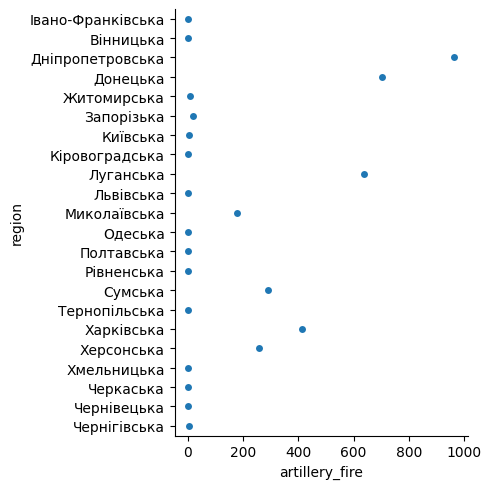

In [26]:
sns.catplot(data=data6, x="artillery_fire", y="region")

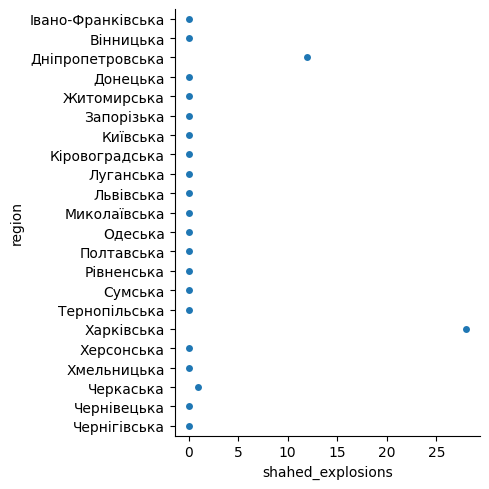

In [24]:
sns.catplot(data=data6, x="shahed_explosions", y="region")

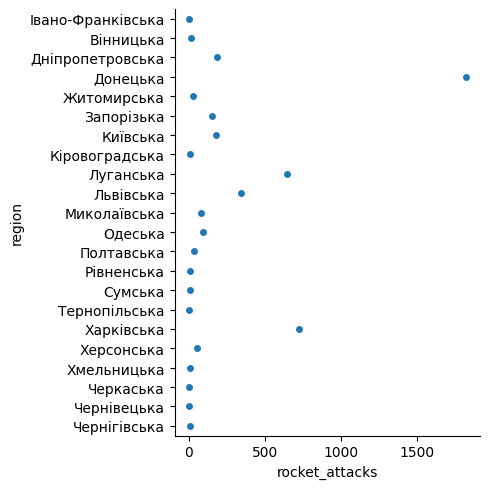

In [25]:
sns.catplot(data=data6, x="rocket_attacks", y="region")

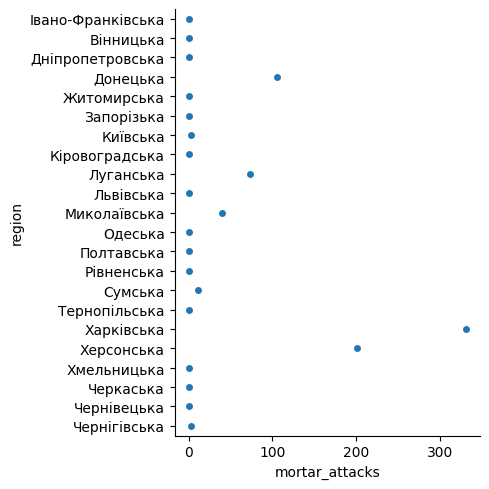

In [27]:
sns.catplot(data=data6, x="mortar_attacks", y="region")

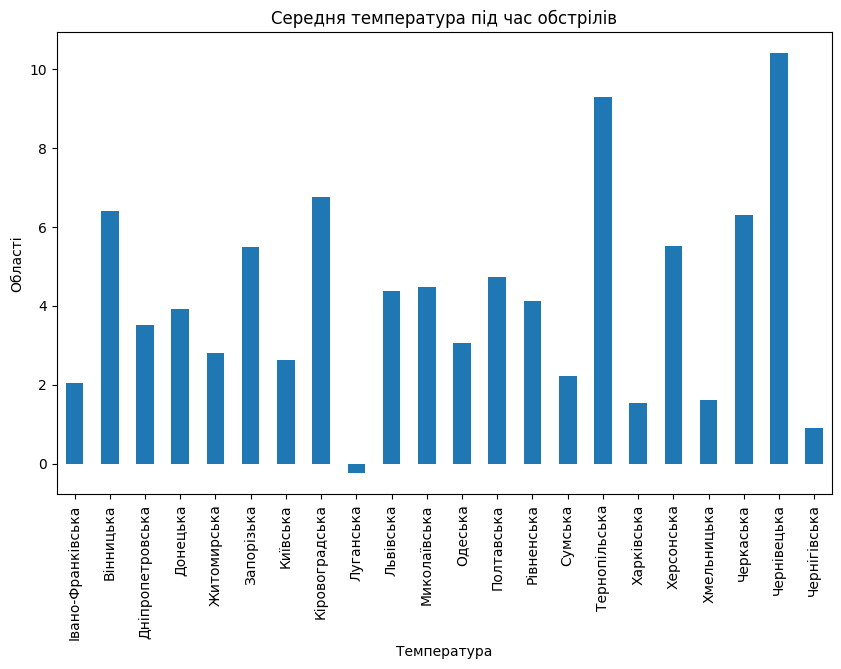

In [73]:
plt.figure(figsize=(10, 6)) 
data10.plot(kind='bar')
plt.xlabel('Температура')
plt.ylabel('Області')
plt.title('Середня температура під час обстрілів')
plt.show()

Графік, який показує залежність обстрілів певних областей від напрямку вітру.

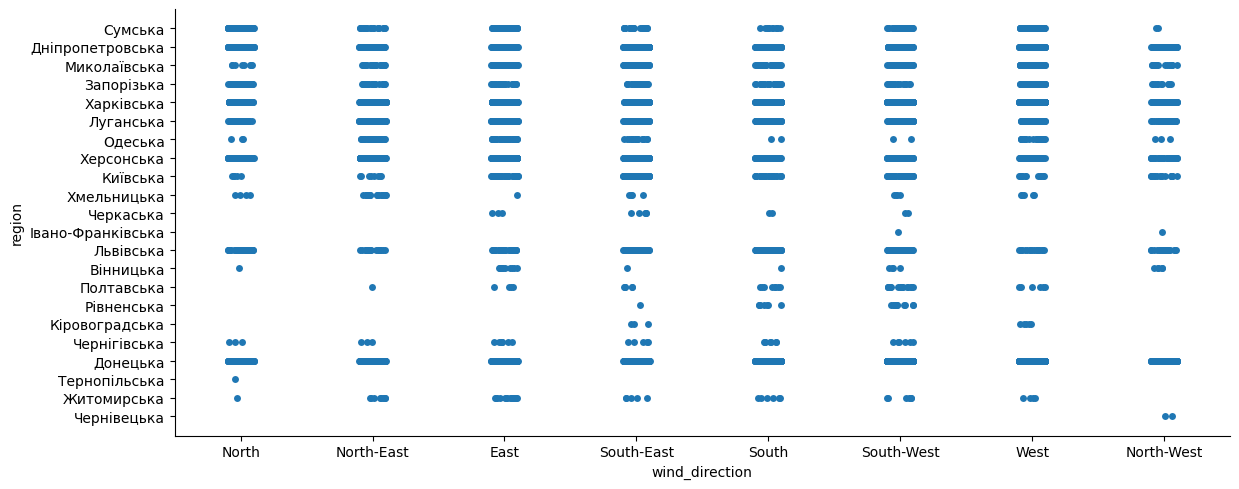

In [8]:
sns.catplot(data=data2, x="wind_direction", y="region", aspect=2.5)

Графік, який показує залежність обстрілів певних областей від погодніх умов.

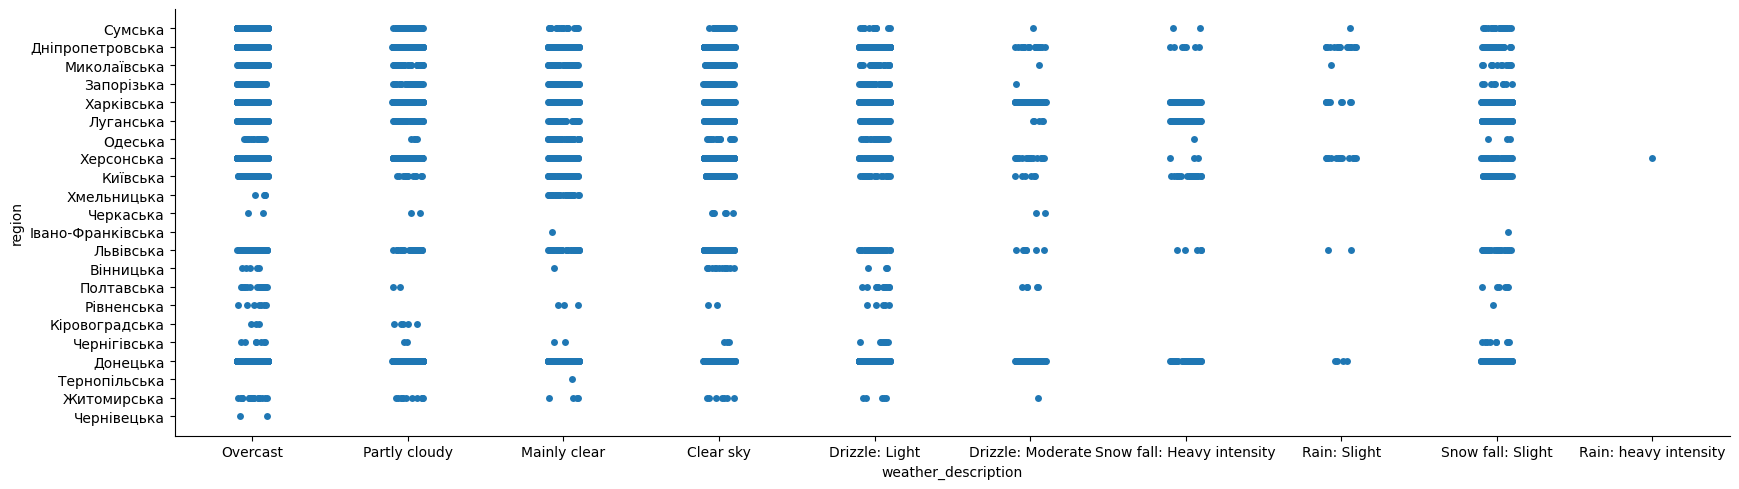

In [29]:
sns.catplot(data=data2, x="weather_description", y="region", aspect=3.5)